In [1]:
import seaborn as sns
from pandas import read_excel
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA # 주성분 분석용 패키지
from pca import pca # 주성분 분석 결과 시각화를 위한 패키지 
from sklearn.preprocessing import StandardScaler # 표준화 패키지 라이브러리
import numpy as np
import pandas as pd
# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler
# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import ols

## 데이터 전처리

In [2]:
df=read_excel('자동차정보.xlsx', engine='openpyxl')
df = df.set_index('차명')

In [3]:
df

,CO²배출량,가격,가속성능(0-100,공차중량,과급방식,구동방식,배기량,변속기,스티어링,승차인원,...,후륜제동장치,후륜타이어,합산출력,합산토크,1회,모터최대출력,모터최대토크,에너지용량,수소연료탱크용량,항속거리
차명,,,,,,,,,,,,,,,,,,,,,
2021 아반떼 N,158.0~164.0g/km,"3,402",정보없음,"1,450~1,485kg",싱글터보,전륜구동,"1,998cc","수동6단 , 자동(DCT)8단",랙앤피니언,5인승,...,V디스크,245mm/35/19inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 스포티지,146.0~150.0g/km,"3,731",정보없음,"1,685~1,715kg",싱글터보,풀타임4륜구동,"1,998cc",자동8단,랙앤피니언,5인승,...,디스크,235mm/55~65/17~19inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 쏘렌토,139.0~147.0g/km,"4,273",정보없음,"1,820~1,835kg",싱글터보,풀타임4륜구동,"2,151cc",자동(DCT)8단,랙앤피니언,5인승,...,디스크,235~255mm/45~60/18~20inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020 아반떼,130.0~136.0g/km,"2,779",정보없음,"1,310~1,340kg",싱글터보,전륜구동,"1,598cc","수동6단 , 자동(DCT)7단",랙앤피니언,5인승,...,디스크,225mm/40/18inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022 베뉴,121.0~125.0g/km,"2,236",정보없음,"1,180~1,215kg",자연흡기,전륜구동,"1,598cc",자동(CVT),랙앤피니언,5인승,...,디스크,185~205mm/55~65/15~17inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019 토요타 시에나,208.0g/km,"5,800",정보없음,"2,175kg",자연흡기,풀타임4륜구동,"3,456cc",자동8단,랙앤피니언,7인승,...,디스크,235mm/55/18inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 동풍소콘 C31,정보없음,"1,250",정보없음,"1,215kg",자연흡기,후륜구동,"1,491cc",수동5단,정보없음,2인승,...,드럼,185mm/80/14inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020 미니 클럽맨 SD,142.0g/km,"4,900",7.7초,"1,595kg",싱글터보,전륜구동,"1,995cc",자동8단,랙앤피니언,5인승,...,디스크,225mm/40/18inch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터 크기

In [4]:
df.shape

(386, 37)

### '정보없음' 결측치로 치환

In [5]:
for i in df:  
    df[i]  = np.where(df[i] == '정보없음', np.nan, df[i])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 2021 아반떼 N to 2019 맥라렌 570S 스파이더
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CO²배출량      324 non-null    object
 1   가격          386 non-null    object
 2   가속성능(0-100  211 non-null    object
 3   공차중량        367 non-null    object
 4   과급방식        349 non-null    object
 5   구동방식        383 non-null    object
 6   배기량         351 non-null    object
 7   변속기         385 non-null    object
 8   스티어링        379 non-null    object
 9   승차인원        383 non-null    object
 10  엔진형식        351 non-null    object
 11  연료          386 non-null    object
 12  연비(등급)      365 non-null    object
 13  윤거전         279 non-null    object
 14  윤거후         279 non-null    object
 15  전고          384 non-null    object
 16  전륜서스펜션      374 non-null    object
 17  전륜제동장치      383 non-null    object
 18  전륜타이어       380 non-null    object
 19  전장          384 non-null    obj

### 결측이 많은 컬럼 삭제

In [7]:
df = df.drop(columns=['항속거리', '수소연료탱크용량', '에너지용량','모터최대토크','모터최대출력','1회','합산토크','합산출력','제동성능','최고속도','윤거전','윤거후','가속성능(0-100','CO²배출량'], axis=1)

## 결측행 삭제 

In [8]:
df= df.dropna(axis=0)
df

,가격,공차중량,과급방식,구동방식,배기량,변속기,스티어링,승차인원,엔진형식,연료,...,전륜제동장치,전륜타이어,전장,전폭,최대출력,최대토크,축거,후륜서스펜션,후륜제동장치,후륜타이어
차명,,,,,,,,,,,,,,,,,,,,,
2021 아반떼 N,"3,402","1,450~1,485kg",싱글터보,전륜구동,"1,998cc","수동6단 , 자동(DCT)8단",랙앤피니언,5인승,I4,가솔린,...,V디스크,245mm/35/19inch,"4,675mm","1,825mm",280hp,40.0kg.m,"2,720mm",멀티링크,V디스크,245mm/35/19inch
2022 스포티지,"3,731","1,685~1,715kg",싱글터보,풀타임4륜구동,"1,998cc",자동8단,랙앤피니언,5인승,I4,디젤,...,V디스크,235mm/55~65/17~19inch,"4,660mm","1,865mm",186hp,42.5kg.m,"2,755mm",멀티링크,디스크,235mm/55~65/17~19inch
2022 쏘렌토,"4,273","1,820~1,835kg",싱글터보,풀타임4륜구동,"2,151cc",자동(DCT)8단,랙앤피니언,5인승,I4,디젤,...,V디스크,235~255mm/45~60/18~20inch,"4,810mm","1,900mm",202hp,45.0kg.m,"2,815mm",멀티링크,디스크,235~255mm/45~60/18~20inch
2020 아반떼,"2,779","1,310~1,340kg",싱글터보,전륜구동,"1,598cc","수동6단 , 자동(DCT)7단",랙앤피니언,5인승,I4,가솔린,...,V디스크,225mm/40/18inch,"4,675mm","1,825mm",204hp,27.0kg.m,"2,720mm",멀티링크,디스크,225mm/40/18inch
2022 베뉴,"2,236","1,180~1,215kg",자연흡기,전륜구동,"1,598cc",자동(CVT),랙앤피니언,5인승,I4,가솔린,...,V디스크,185~205mm/55~65/15~17inch,"4,040mm","1,770mm",123hp,15.7kg.m,"2,520mm",토션빔,디스크,185~205mm/55~65/15~17inch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019 맥라렌 600LT 스파이더,"3억1,500","1,297kg",트윈터보,후륜구동,"3,799cc",자동(DCT)7단,랙앤피니언,2인승,V8,가솔린,...,디스크,225mm/35/19inch,"4,604mm","2,095mm",600hp,63.2kg.m,"2,670mm",더블위시본,디스크,285mm/35/20inch
2019 토요타 시에나,"5,800","2,175kg",자연흡기,풀타임4륜구동,"3,456cc",자동8단,랙앤피니언,7인승,V6,가솔린,...,V디스크,235mm/55/18inch,"5,095mm","1,985mm",301hp,36.4kg.m,"3,030mm",토션빔,디스크,235mm/55/18inch
2020 미니 클럽맨 SD,"4,900","1,595kg",싱글터보,전륜구동,"1,995cc",자동8단,랙앤피니언,5인승,I4,디젤,...,V디스크,225mm/40/18inch,"4,266mm","1,800mm",190hp,40.8kg.m,"2,670mm",멀티링크,디스크,225mm/40/18inch


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 2021 아반떼 N to 2019 맥라렌 570S 스파이더
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가격      309 non-null    object
 1   공차중량    309 non-null    object
 2   과급방식    309 non-null    object
 3   구동방식    309 non-null    object
 4   배기량     309 non-null    object
 5   변속기     309 non-null    object
 6   스티어링    309 non-null    object
 7   승차인원    309 non-null    object
 8   엔진형식    309 non-null    object
 9   연료      309 non-null    object
 10  연비(등급)  309 non-null    object
 11  전고      309 non-null    object
 12  전륜서스펜션  309 non-null    object
 13  전륜제동장치  309 non-null    object
 14  전륜타이어   309 non-null    object
 15  전장      309 non-null    object
 16  전폭      309 non-null    object
 17  최대출력    309 non-null    object
 18  최대토크    309 non-null    object
 19  축거      309 non-null    object
 20  후륜서스펜션  309 non-null    object
 21  후륜제동장치  309 non-null    object
 22  후륜타이어  

In [10]:
val_1 = []
val_2 = []
val_3 = []
for i in df.iloc:
    if type(i['후륜타이어']) != float:
        tmp = i['후륜타이어'].split('/')
        val_1.append(tmp[0])
        val_2.append(tmp[1])
        val_3.append(tmp[2])
    else:
        val_1.append(np.nan)
        val_2.append(np.nan)
        val_3.append(np.nan)

df['후륜타이어_폭'] = val_1
df['후륜타이어_편평비'] = val_2
df['후륜타이어_림직경'] = val_3


In [11]:
val_1 = []
val_2 = []
val_3 = []
for i in df.iloc:
    if type(i['전륜타이어']) != float:
        tmp = i['전륜타이어'].split('/')
        val_1.append(tmp[0])
        val_2.append(tmp[1])
        val_3.append(tmp[2])
    else:
        val_1.append(np.nan)
        val_2.append(np.nan)
        val_3.append(np.nan)

df['전륜타이어_폭'] = val_1
df['전륜타이어_편평비'] = val_2
df['전륜타이어_림직경'] = val_3

In [12]:
df = df.drop(columns=['후륜타이어', '전륜타이어'], axis=1)

In [13]:
for i,v in enumerate(df.iloc):
    if type(v['연비(등급)']) != float:
        df.iloc[i]['연비(등급)'] = v['연비(등급)'][v['연비(등급)'].rfind('(') + 1 :]

In [14]:
df['연비(등급)']

차명
2021 아반떼 N              4등급)
2022 스포티지               3등급)
2022 쏘렌토                3등급)
2020 아반떼                3등급)
2022 베뉴                 3등급)
                       ...  
2019 맥라렌 600LT 스파이더    정보없음)
2019 토요타 시에나            5등급)
2020 미니 클럽맨 SD          3등급)
2020 미니 클럽맨 S           4등급)
2019 맥라렌 570S 스파이더     정보없음)
Name: 연비(등급), Length: 309, dtype: object

In [15]:
df.iloc[1]

가격                   3,731
공차중량         1,685~1,715kg
과급방식                  싱글터보
구동방식               풀타임4륜구동
배기량                1,998cc
변속기                   자동8단
스티어링                 랙앤피니언
승차인원                   5인승
엔진형식                    I4
연료                      디젤
연비(등급)                3등급)
전고           1,660~1,680mm
전륜서스펜션              맥퍼슨스트럿
전륜제동장치                V디스크
전장                 4,660mm
전폭                 1,865mm
최대출력                 186hp
최대토크              42.5kg.m
축거                 2,755mm
후륜서스펜션                멀티링크
후륜제동장치                 디스크
후륜타이어_폭              235mm
후륜타이어_편평비            55~65
후륜타이어_림직경        17~19inch
전륜타이어_폭              235mm
전륜타이어_편평비            55~65
전륜타이어_림직경        17~19inch
Name: 2022 스포티지, dtype: object

In [16]:
df['공차중량'] = df['공차중량'].str.replace('kg', '')
df['공차중량'] = df['공차중량'].str.replace(',', '')
df['배기량'] = df['배기량'].str.replace('cc', '')
df['전장'] = df['전장'].str.replace('mm', '')
df['전폭'] = df['전폭'].str.replace('mm', '')
df['전고'] = df['전고'].str.replace('mm', '')
df['배기량'] = df['배기량'].str.replace(',', '')
df['전장'] = df['전장'].str.replace(',', '')
df['전폭'] = df['전폭'].str.replace(',', '')
df['전고'] = df['전고'].str.replace(',', '')
df['최대출력'] = df['최대출력'].str.replace('hp', '')
df['최대토크'] = df['최대토크'].str.replace('kg.m', '')
df['축거'] = df['축거'].str.replace('mm', '')
df['축거'] = df['축거'].str.replace(',', '')
df['후륜타이어_폭'] = df['후륜타이어_폭'].str.replace('mm', '')
df['후륜타이어_림직경'] = df['후륜타이어_림직경'].str.replace('inch', '')
df['전륜타이어_폭'] = df['전륜타이어_폭'].str.replace('mm', '')
df['전륜타이어_림직경'] = df['전륜타이어_림직경'].str.replace('inch', '')
df['연비(등급)'] = df['연비(등급)'].str.replace(')', '')
df['가격'] = df['가격'].str.replace('억', '')
df['가격'] = df['가격'].str.replace(',', '')

<ipython-input-16-d58304c8b5dc>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['최대토크'] = df['최대토크'].str.replace('kg.m', '')
<ipython-input-16-d58304c8b5dc>:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['연비(등급)'] = df['연비(등급)'].str.replace(')', '')


In [17]:
for i,v in enumerate(df.iloc):
    for j in df:
        if type(v[j]) != float:
            if '~' in v[j]:
                df.iloc[i][j] = v[j][v[j].find('~')+1:]

In [18]:
for i in df:  
    df[i]  = np.where(df[i] == '정보없음', np.nan, df[i])
df= df.dropna(axis=0)
df

,가격,공차중량,과급방식,구동방식,배기량,변속기,스티어링,승차인원,엔진형식,연료,...,최대토크,축거,후륜서스펜션,후륜제동장치,후륜타이어_폭,후륜타이어_편평비,후륜타이어_림직경,전륜타이어_폭,전륜타이어_편평비,전륜타이어_림직경
차명,,,,,,,,,,,,,,,,,,,,,
2021 아반떼 N,3402,1485,싱글터보,전륜구동,1998,"수동6단 , 자동(DCT)8단",랙앤피니언,5인승,I4,가솔린,...,40.0,2720,멀티링크,V디스크,245,35,19,245,35,19
2022 스포티지,3731,1715,싱글터보,풀타임4륜구동,1998,자동8단,랙앤피니언,5인승,I4,디젤,...,42.5,2755,멀티링크,디스크,235,65,19,235,65,19
2022 쏘렌토,4273,1835,싱글터보,풀타임4륜구동,2151,자동(DCT)8단,랙앤피니언,5인승,I4,디젤,...,45.0,2815,멀티링크,디스크,255,60,20,255,60,20
2020 아반떼,2779,1340,싱글터보,전륜구동,1598,"수동6단 , 자동(DCT)7단",랙앤피니언,5인승,I4,가솔린,...,27.0,2720,멀티링크,디스크,225,40,18,225,40,18
2022 베뉴,2236,1215,자연흡기,전륜구동,1598,자동(CVT),랙앤피니언,5인승,I4,가솔린,...,15.7,2520,토션빔,디스크,205,65,17,205,65,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021 렉서스 LC 하이브리드,17950,2005,자연흡기,후륜구동,3456,자동(CVT),랙앤피니언,4인승,V6,"전기 , 가솔린",...,35.7,2870,멀티링크,V디스크,275,35,21,245,40,21
2021 푸조 508 GT,5172,1680,싱글터보,전륜구동,1997,자동8단,랙앤피니언,5인승,l4,디젤,...,40.8,2800,멀티링크,디스크,235,40,19,235,40,19
2019 토요타 시에나,5800,2175,자연흡기,풀타임4륜구동,3456,자동8단,랙앤피니언,7인승,V6,가솔린,...,36.4,3030,토션빔,디스크,235,55,18,235,55,18


In [19]:
df['가격'] = df['가격'].astype('int')
df['공차중량'] = df['공차중량'].astype('int')
df['배기량'] = df['배기량'].astype('int')
df['전고'] = df['전고'].astype('float')
df['전장'] = df['전장'].astype('float')
df['전폭'] = df['전폭'].astype('float')
df['최대출력'] = df['최대출력'].astype('float')
df['최대토크'] = df['최대토크'].astype('float')
df['축거'] = df['축거'].astype('float')
df['후륜타이어_폭'] = df['후륜타이어_폭'].astype('float')
df['후륜타이어_편평비'] = df['후륜타이어_편평비'].astype('float')
df['후륜타이어_림직경'] = df['후륜타이어_림직경'].astype('float')
df['전륜타이어_폭'] = df['전륜타이어_폭'].astype('float')
df['전륜타이어_편평비'] = df['전륜타이어_편평비'].astype('float')
df['전륜타이어_림직경'] = df['전륜타이어_림직경'].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 2021 아반떼 N to 2020 미니 클럽맨 S
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   가격         294 non-null    int32  
 1   공차중량       294 non-null    int32  
 2   과급방식       294 non-null    object 
 3   구동방식       294 non-null    object 
 4   배기량        294 non-null    int32  
 5   변속기        294 non-null    object 
 6   스티어링       294 non-null    object 
 7   승차인원       294 non-null    object 
 8   엔진형식       294 non-null    object 
 9   연료         294 non-null    object 
 10  연비(등급)     294 non-null    object 
 11  전고         294 non-null    float64
 12  전륜서스펜션     294 non-null    object 
 13  전륜제동장치     294 non-null    object 
 14  전장         294 non-null    float64
 15  전폭         294 non-null    float64
 16  최대출력       294 non-null    float64
 17  최대토크       294 non-null    float64
 18  축거         294 non-null    float64
 19  후륜서스펜션     294 non-null    object 
 

In [21]:
for i in df:
    if df[i].dtype == 'O':
        print('%s :' %i, df[i].unique())


과급방식 : ['싱글터보' '자연흡기' '트윈터보' '슈퍼차저']
구동방식 : ['전륜구동' '풀타임4륜구동' '파트타임4륜구동' '후륜구동']
변속기 : ['수동6단  ,\xa0자동(DCT)8단' '자동8단' '자동(DCT)8단' '수동6단  ,\xa0자동(DCT)7단'
 '자동(CVT)' '자동6단' '자동(DCT)7단' '자동4단' '자동(DCT)6단' '자동6단  ,\xa0수동6단'
 '토크컨버터8단' '자동9단' '자동7단' '자동10단']
스티어링 : ['랙앤피니언' '렉앤피니언' '유압식파워스티어링']
승차인원 : ['5인승' '7인승' '8인승' '9인승' '4인승' '2인승' '6인승']
엔진형식 : ['I4' 'V6' 'l4' 'l3' 'I3' 'V8' 'l6' 'I6' 'F6' 'V10' 'V12' 'F4' 'V12MPI'
 'V85.0']
연료 : ['가솔린' '디젤' '전기  , 가솔린' 'LPG']
연비(등급) : ['4등급' '3등급' '5등급' '하이브리드' '2등급' '경형' '1등급']
전륜서스펜션 : ['맥퍼슨스트럿' '멀티링크' '더블위시본' '더블위쉬본' '더블조인트스트럿' '독립코일오버' '싱글조인트스트럿' '싱글조인트'
 '싱글조인트스프링스트럿' '알루미늄더블위시본']
전륜제동장치 : ['V디스크' '디스크']
후륜서스펜션 : ['멀티링크' '토션빔' '5링크코일스프링' '어댑티브모션링크' 'Z링크' '5링크' '더블위시본' '인테그랄링크' '맥퍼슨스트럿'
 '솔리드액슬' '리프스프링' '스트럿' '트위스트빔' '트레일링암' '알루미늄더블위시본' '4링크' '멀티암']
후륜제동장치 : ['V디스크' '디스크' '드럼' 'V디스크,디스크']


In [22]:
df['스티어링']  = np.where(df['스티어링'] == '렉앤피니언', '랙앤피니언', df['스티어링'])
df['전륜서스펜션'] = np.where(df['전륜서스펜션'] == '더블위쉬본', '더블위시본', df['전륜서스펜션'])
df['전륜제동장치'] = np.where(df['전륜제동장치']  == 'v디스크', 'V디스크', df['전륜제동장치'])
df['후륜서스펜션'] = np.where(df['후륜서스펜션']   == '리지드엑슬', '리지드액슬',df['후륜서스펜션'] )

In [23]:
df['과급방식'] = df['과급방식'].astype('category').cat.rename_categories({'싱글터보' : 0, '자연흡기':1, '트윈터보':2,'슈퍼차저':3})
df['구동방식'] = df['구동방식'].astype('category').cat.rename_categories({'전륜구동':0, '풀타임4륜구동':1, '파트타임4륜구동':2, '후륜구동':3,'풀타임4륜구동,후륜구동':4})
df['변속기'] = df['변속기'].astype('category').cat.rename_categories({'수동6단  ,\xa0자동(DCT)8단' : 0, '자동8단' :1, '자동(DCT)8단' :2, '수동6단  ,\xa0자동(DCT)7단' :3,
                                                             '자동(CVT)':4, '자동6단':5, '자동(DCT)7단':6, '자동1단':7, '자동4단':8, '자동(DCT)6단':9, '자동':10, '수동6단':11,
                                                             '자동6단  ,\xa0수동6단':12, '자동9단':13, '토크컨버터8단':14, '자동7단':15, '자동10단':16, '자동2단':17,
                                                                                                                        '자동(CVT)  ,\xa0정보없음':18,'수동5단':19})
df['스티어링'] = df['스티어링'].astype('category').cat.rename_categories({'랙앤피니언':0, '유압식파워스티어링':1})
df['승차인원'] = df['승차인원'].astype('category').cat.rename_categories({'5인승' :5, '7인승':7, '8인승':8, '9인승':9, '4인승':4, '2인승':2, '6인승':6, '16인승':16,'3인승':3, '1인승':1, '15인승':15})
df['엔진형식'] = df['엔진형식'].astype('category').cat.rename_categories({'I4':0, 'V6':1, 'l4':2, 'l3':3, 'I3':4, 'V8':5, 'I6':6, 'l6':7, 'V12':8, 'F6':9, 'F4':10, 'V10':11,
                                                                    'V12MPI':12, 'V85.0':13, 'DVVT':14})
df['연료'] = df['연료'].astype('category').cat.rename_categories({'가솔린':0, '디젤':1, '전기  , 가솔린':2, '전기':3, 'LPG':4, '수소':5})
df['연비(등급)'] = df['연비(등급)'].astype('category').cat.rename_categories({'4등급':4,'3등급':3, '5등급':5, '하이브리드':7, '2등급':2, '경형':6, '1등급':1})
df['전륜서스펜션'] = df['전륜서스펜션'].astype('category').cat.rename_categories({'맥퍼슨스트럿':0, '멀티링크':1, '더블위시본':2,'리지드엑슬':4, '더블조인트스트럿':5, '독립코일오버':6,
                                                     '싱글조인트스트럿':7, '싱글조인트':8, '싱글조인트스프링스트럿':9, '알루미늄더블위시본':10})
df['전륜제동장치'] = df['전륜제동장치'].astype('category').cat.rename_categories({'V디스크':0, '디스크':1})
df['후륜서스펜션'] = df['후륜서스펜션'].astype('category').cat.rename_categories({'멀티링크':1, '토션빔':11, '5링크코일스프링':12, '어댑티브모션링크':13,'트레일링암':14, '리지드':15, '리지드액슬':4,
                                                 '리프스프링':16, '트레일링':17, 'Z링크':18, '5링크':19, '더블위시본':2, '인테그랄링크':20, '맥퍼슨스트럿':0, '솔리드액슬':21, '트라페조이덜링크':22,
                                                                                                     '스트럿':23, '트위스트빔':24, '드디온':25, '알루미늄더블위시본':10, '4링크':26, '멀티암':27})
df['후륜제동장치'] = df['후륜제동장치'].astype('category').cat.rename_categories({'V디스크':0, '디스크':1,'드럼':2,'V디스크,디스크':3})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 2021 아반떼 N to 2020 미니 클럽맨 S
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   가격         294 non-null    int32   
 1   공차중량       294 non-null    int32   
 2   과급방식       294 non-null    category
 3   구동방식       294 non-null    category
 4   배기량        294 non-null    int32   
 5   변속기        294 non-null    category
 6   스티어링       294 non-null    category
 7   승차인원       294 non-null    category
 8   엔진형식       294 non-null    category
 9   연료         294 non-null    category
 10  연비(등급)     294 non-null    category
 11  전고         294 non-null    float64 
 12  전륜서스펜션     294 non-null    category
 13  전륜제동장치     294 non-null    category
 14  전장         294 non-null    float64 
 15  전폭         294 non-null    float64 
 16  최대출력       294 non-null    float64 
 17  최대토크       294 non-null    float64 
 18  축거         294 non-null    float64 
 19  후륜서스펜션     294 

# 문제2번)

## 주성분 분석

In [25]:
for i in df:
    print('"%s",'%i,end=' ')

"가격", "공차중량", "과급방식", "구동방식", "배기량", "변속기", "스티어링", "승차인원", "엔진형식", "연료", "연비(등급)", "전고", "전륜서스펜션", "전륜제동장치", "전장", "전폭", "최대출력", "최대토크", "축거", "후륜서스펜션", "후륜제동장치", "후륜타이어_폭", "후륜타이어_편평비", "후륜타이어_림직경", "전륜타이어_폭", "전륜타이어_편평비", "전륜타이어_림직경", 

In [26]:
target_df = df.filter(["공차중량", "과급방식", "구동방식", "배기량", "변속기", "스티어링", "승차인원", "엔진형식", "연료", "연비(등급)", "전고", "전륜서스펜션", "전륜제동장치", "전장", "전폭", 
                       "최대출력", "최대토크", "축거", "후륜서스펜션", "후륜제동장치", "후륜타이어_폭", "후륜타이어_편평비", "후륜타이어_림직경", "전륜타이어_폭", "전륜타이어_편평비", "전륜타이어_림직경"])
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 2021 아반떼 N to 2020 미니 클럽맨 S
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   공차중량       294 non-null    int32   
 1   과급방식       294 non-null    category
 2   구동방식       294 non-null    category
 3   배기량        294 non-null    int32   
 4   변속기        294 non-null    category
 5   스티어링       294 non-null    category
 6   승차인원       294 non-null    category
 7   엔진형식       294 non-null    category
 8   연료         294 non-null    category
 9   연비(등급)     294 non-null    category
 10  전고         294 non-null    float64 
 11  전륜서스펜션     294 non-null    category
 12  전륜제동장치     294 non-null    category
 13  전장         294 non-null    float64 
 14  전폭         294 non-null    float64 
 15  최대출력       294 non-null    float64 
 16  최대토크       294 non-null    float64 
 17  축거         294 non-null    float64 
 18  후륜서스펜션     294 non-null    category
 19  후륜제동장치     294 

In [27]:
std_x = StandardScaler().fit_transform(target_df.values)
std_x

array([[-1.04400321, -0.87171242, -1.15193362, ...,  0.07376267,
        -1.20538656, -0.12562169],
       [-0.40700346, -0.87171242, -0.0305148 , ..., -0.397677  ,
         1.71937532, -0.12562169],
       [-0.07465577, -0.87171242, -0.0305148 , ...,  0.54520234,
         1.23191501,  0.57122318],
       ...,
       [ 0.86699604,  0.23295763, -0.0305148 , ..., -0.397677  ,
         0.7444547 , -0.82246657],
       [-0.73935116, -0.87171242, -1.15193362, ..., -0.86911667,
        -0.71792624, -0.82246657],
       [-0.96091629, -0.87171242, -1.15193362, ..., -0.86911667,
        -0.71792624, -0.82246657]])

In [28]:
model = PCA(n_components=26)
model.fit(std_x)
model.fit_transform(std_x)
result = DataFrame({'설명가능한 분산 비율(고윳값)':model.explained_variance_, '기여율':model.explained_variance_ratio_}, index=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26'])
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,10.340848,0.396372,0.396372
pca2,3.804932,0.145846,0.542218
pca3,1.534647,0.058824,0.601042
pca4,1.226612,0.047017,0.648059
pca5,1.124830,0.043116,0.691175
pca6,1.025023,0.039290,0.730464
pca7,0.992037,0.038025,0.768490
pca8,0.879435,0.033709,0.802199
pca9,0.769796,0.029507,0.831706
pca10,0.731751,0.028049,0.859755


<ipython-input-29-c9725a240efe>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result.index,rotation=90)


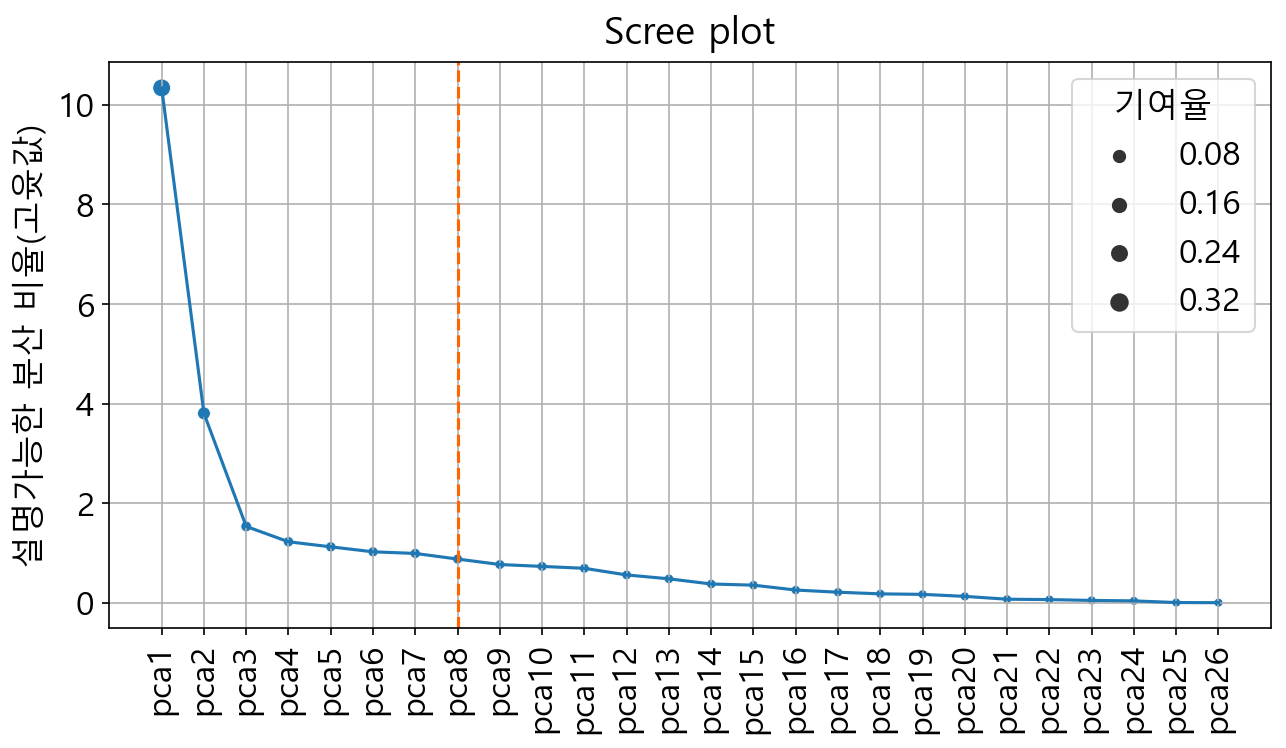

In [29]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)

sns.lineplot(x=result.index, y='설명가능한 분산 비율(고윳값)', data=result, ax=ax)
sns.scatterplot(x=result.index, y='설명가능한 분산 비율(고윳값)', size='기여율', data=result, ax=ax)

ax.grid()
ax.set_title('Scree plot', fontsize=18, pad=9)
ax.set_xticklabels(result.index,rotation=90)

for i, v in enumerate(result['누적기여율']):
    if v > 0.8:
        ax.axvline(result.index[i], ls='--', color='#ff6600')
        break


plt.show()
plt.close()

In [30]:
model = pca(n_components=8)
fit = model.fit_transform(target_df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [26] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [31]:
fit['loadings']

,공차중량,과급방식,구동방식,배기량,변속기,스티어링,승차인원,엔진형식,연료,연비(등급),...,최대토크,축거,후륜서스펜션,후륜제동장치,후륜타이어_폭,후륜타이어_편평비,후륜타이어_림직경,전륜타이어_폭,전륜타이어_편평비,전륜타이어_림직경
PC1,0.171988,0.000459,0.000357,0.961154,0.000398,0.000009,-0.000252,0.001620,-0.000204,0.000419,...,0.012123,0.075049,-0.000308,-0.000215,0.020079,-0.004913,0.000819,0.011157,-0.004150,0.000784
PC2,0.640878,0.000162,-0.000115,-0.230951,-0.000193,-0.000021,0.001537,-0.001779,0.000380,0.000323,...,0.005811,0.357917,0.000897,-0.000145,0.004858,0.006236,0.000983,0.021127,0.005695,0.001123
PC3,0.523870,0.000300,-0.000205,0.035594,0.000595,-0.000028,0.000606,0.001286,-0.000193,0.000915,...,0.009121,-0.287481,0.004219,-0.000249,0.004925,0.012111,0.001617,0.017286,0.010530,0.001689
PC4,0.405152,0.001603,0.001555,-0.135414,0.000790,-0.000016,-0.002201,0.005392,-0.000826,0.002153,...,0.065918,-0.171898,-0.007202,-0.001853,0.110861,-0.056673,0.004740,0.058837,-0.051945,0.004278
PC5,-0.263053,0.000966,-0.000295,-0.042056,0.003058,0.000115,-0.000040,0.002547,-0.001351,0.000452,...,0.030797,-0.510388,0.002463,0.000360,0.095286,0.012644,0.003281,0.062537,0.011288,0.002278
PC6,-0.221079,0.001508,0.000501,-0.037504,-0.000978,-0.000025,0.000298,0.002776,-0.004303,0.003472,...,0.058440,0.671762,0.008853,0.000307,0.032523,-0.016139,0.000638,0.012565,-0.011081,0.000691
PC7,-0.033557,-0.003729,0.000226,0.005417,0.016070,0.000277,-0.000871,-0.007067,0.004255,-0.003687,...,-0.015864,0.201353,-0.015927,0.001568,0.081733,0.000785,0.003664,0.013830,0.004335,0.002960
PC8,-0.038869,-0.005363,0.003096,0.004818,-0.039228,0.000119,-0.004685,0.017694,-0.001729,-0.004025,...,0.104718,0.034498,0.028399,-0.002605,0.730170,-0.175294,0.017607,0.598946,-0.152433,0.016642


In [32]:
fit['topfeat']

,PC,feature,loading,type
0,PC1,배기량,0.961154,best
1,PC2,공차중량,0.640878,best
2,PC3,전장,-0.640719,best
3,PC4,전고,-0.648346,best
4,PC5,축거,-0.510388,best
5,PC6,축거,0.671762,best
6,PC7,전폭,0.905599,best
7,PC8,후륜타이어_폭,0.730170,best
8,PC8,과급방식,-0.005363,weak
9,PC8,구동방식,0.003096,weak


In [33]:
new_df = df.drop(["과급방식", "구동방식", "변속기", "스티어링", "승차인원", "엔진형식", "연료", "연비(등급)", "전륜서스펜션", "전륜제동장치", "최대출력", "최대토크", "후륜서스펜션", "후륜제동장치", "후륜타이어_편평비", "후륜타이어_림직경", "전륜타이어_폭", "전륜타이어_편평비", "전륜타이어_림직경"], axis=1)
new_df

,가격,공차중량,배기량,전고,전장,전폭,축거,후륜타이어_폭
차명,,,,,,,,
2021 아반떼 N,3402,1485,1998,1415.0,4675.0,1825.0,2720.0,245.0
2022 스포티지,3731,1715,1998,1680.0,4660.0,1865.0,2755.0,235.0
2022 쏘렌토,4273,1835,2151,1700.0,4810.0,1900.0,2815.0,255.0
2020 아반떼,2779,1340,1598,1420.0,4675.0,1825.0,2720.0,225.0
2022 베뉴,2236,1215,1598,1585.0,4040.0,1770.0,2520.0,205.0
...,...,...,...,...,...,...,...,...
2021 렉서스 LC 하이브리드,17950,2005,3456,1345.0,4760.0,1920.0,2870.0,275.0
2021 푸조 508 GT,5172,1680,1997,1420.0,4750.0,1860.0,2800.0,235.0
2019 토요타 시에나,5800,2175,3456,1790.0,5095.0,1985.0,3030.0,235.0


In [34]:
# 독립변수
x_train_set = new_df.filter(['공차중량','배기량','전고','전장','전폭','축거','후륜타이어_폭'])
# 종속변수
y_train_set = new_df.filter(['가격'])

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size = 0.2, random_state = 777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 235, 검증용 데이터셋 크기: 59


In [36]:
scaler = StandardScaler()
std_x_train = DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
std_x_test = DataFrame(scaler.transform(x_test), columns=x_test.columns)


In [37]:
std_x_train.head()

,공차중량,배기량,전고,전장,전폭,축거,후륜타이어_폭
0,-1.327665,-1.181603,0.701171,-1.447840,-1.367199,-1.379909,-1.231728
1,-0.880163,1.049288,-1.958882,-0.167068,2.481902,-0.751320,1.301804
2,0.584390,0.176704,-0.438038,0.706729,0.677636,0.951109,0.985113
3,1.370910,1.038971,-0.267157,2.187996,0.797921,3.025452,0.035038
4,-0.541146,-0.678685,-1.064603,-0.101234,-0.525208,-0.274640,0.035038


In [38]:
std_x_test.head()

,공차중량,배기량,전고,전장,전폭,축거,후륜타이어_폭
0,-0.435373,-0.667509,-0.779801,0.123200,-0.344781,-0.096540,-0.598345
1,0.340298,0.193898,-0.751321,0.751616,0.016072,0.636814,0.668421
2,2.252354,0.156931,1.156855,0.976051,1.579769,1.082065,0.668421
3,0.448783,1.394023,-0.665880,1.065824,0.557352,1.071588,0.985113
4,-1.070013,-0.237665,-1.491806,-1.076776,-1.054459,-1.798968,0.351730


In [39]:
y_train.head()

,가격
차명,
2022 쉐보레 트랙스,2333
2020 맥라렌 GT,28200
2020 마세라티 기블리,15700
2021 벤츠 마이바흐 S클래스,26060
2021 아우디 A5,6682


In [40]:
y_test.head()

,가격
차명,
2021 푸조 508 SW,5175
2021 벤츠 CLS클래스,12260
2020 링컨 에비에이터 플러그인 하이브리드,9850
2020 BMW M8 그란쿠페,23550
2019 포르쉐 카이맨,9830


## 문제3번)

In [41]:
model = Sequential()
# 2차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (7, )))
model.add(Dense(32, activation = 'relu'))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [42]:
result = model.fit(std_x_train, y_train, epochs = 500, validation_data = (std_x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
    #ModelCheckpoint(filepath = '{epoch:02d}-{val_loss:.5f}.h5', monitor = 'val_loss', verbose=1, save_best_only = True)
])
result.history.keys()

Epoch 1/500
8/8 [==============================] - 1s 24ms/step - loss: 220598160.0000 - mae: 10326.0840 - val_loss: 217466528.0000 - val_mae: 10192.3203
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 220588992.0000 - mae: 10325.7129 - val_loss: 217457056.0000 - val_mae: 10191.9746
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 220579184.0000 - mae: 10325.3262 - val_loss: 217446608.0000 - val_mae: 10191.5996
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 220569024.0000 - mae: 10324.9062 - val_loss: 217434608.0000 - val_mae: 10191.1719
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 220557104.0000 - mae: 10324.4219 - val_loss: 217420544.0000 - val_mae: 10190.6631
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 220542688.0000 - mae: 10323.8369 - val_loss: 217403392.0000 - val_mae: 10190.0342
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 220524496.

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

In [43]:
result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,220598160.0,10326.083984,217466528.0,10192.320312,0.0010
2,220588992.0,10325.712891,217457056.0,10191.974609,0.0010
3,220579184.0,10325.326172,217446608.0,10191.599609,0.0010
4,220569024.0,10324.906250,217434608.0,10191.171875,0.0010
5,220557104.0,10324.421875,217420544.0,10190.663086,0.0010
...,...,...,...,...,...
170,33400092.0,3900.071533,34888564.0,3483.714600,0.0010
171,33285552.0,3893.221924,34898228.0,3484.824219,0.0010
172,33194810.0,3889.567871,34895608.0,3485.847412,0.0010


## 문제4번)

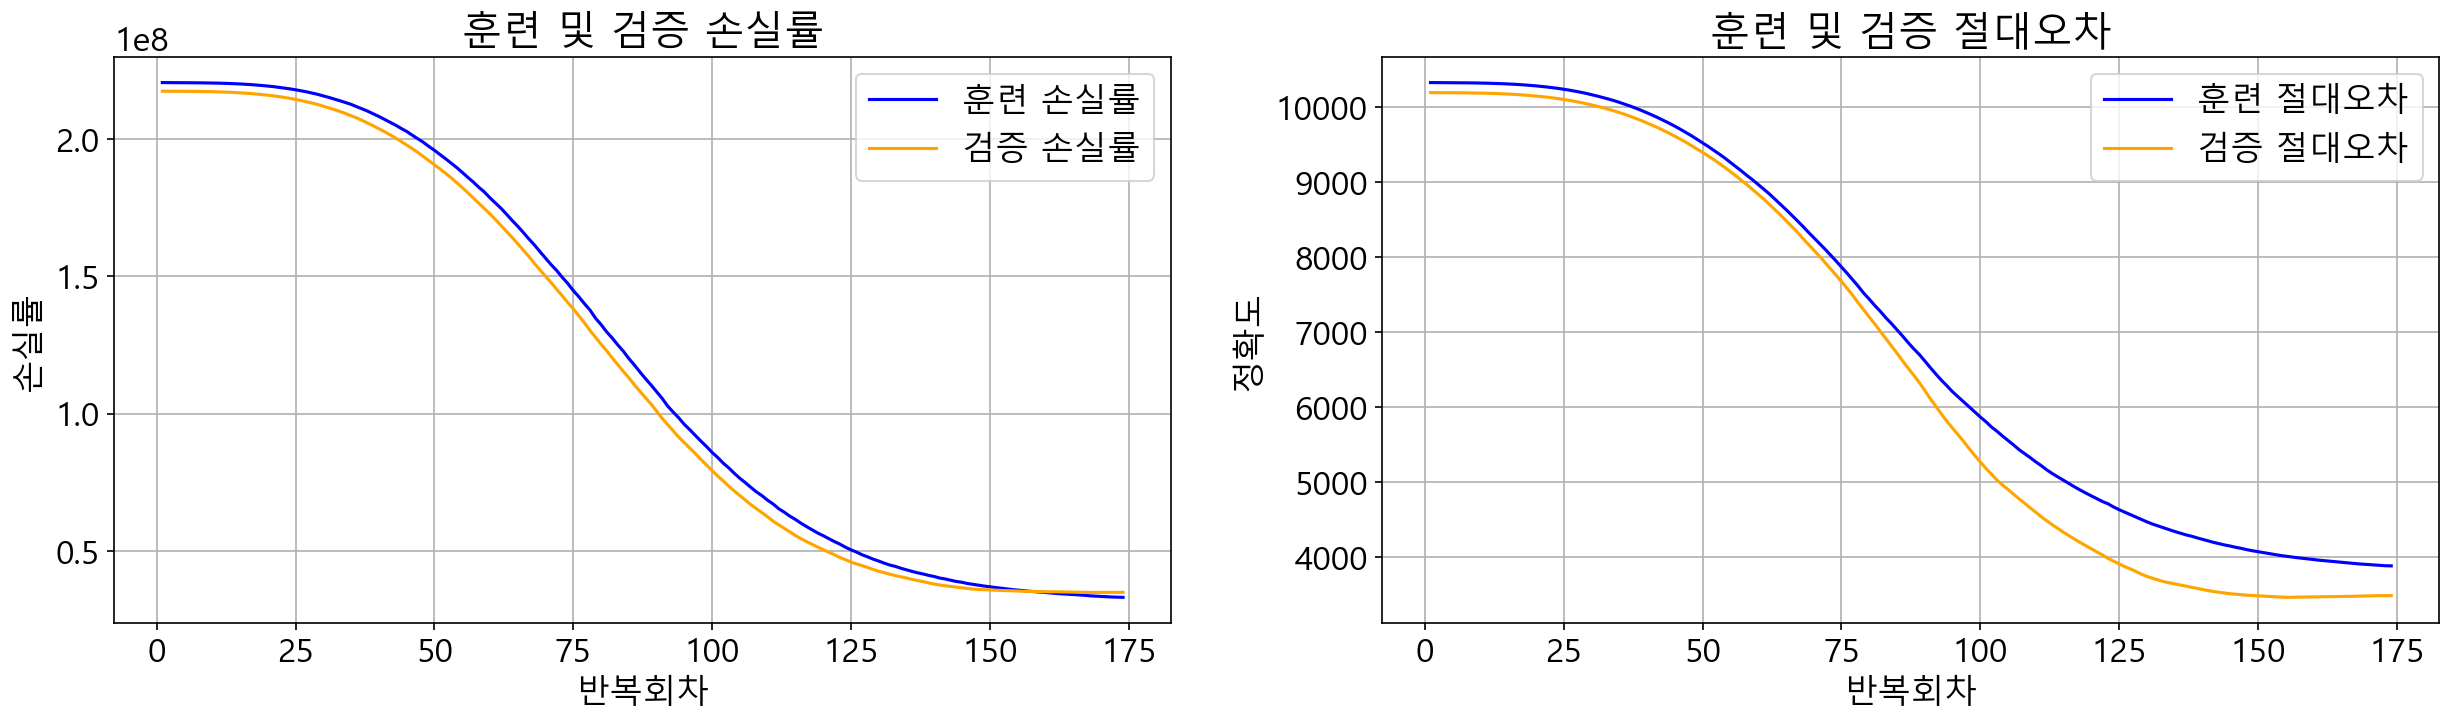

In [44]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='mae', data=result_df, color = 'blue', label = '훈련 절대오차', ax=ax2)
sns.lineplot(x=result_df.index, y='val_mae', data=result_df, color = 'orange', label = '검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [45]:
evaluate = model.evaluate(std_x_test, y_test)
print("최종 손실률: %f, 최종 절대오차: %f" % (evaluate[0], evaluate[1]))

2/2 [==============================] - 0s 2ms/step - loss: 34885244.0000 - mae: 3486.9604
최종 손실률: 34885244.000000, 최종 절대오차: 3486.960449


## 문제5번)

In [46]:
test_predictions = model.predict(std_x_test)
test_predictions

array([[ 3084.6233 ],
       [12497.796  ],
       [15349.599  ],
       [20501.613  ],
       [ 9644.737  ],
       [ 1808.1707 ],
       [ 3603.2332 ],
       [ 4425.9614 ],
       [ 1656.0405 ],
       [ 6626.5674 ],
       [ 3042.248  ],
       [ 5115.7715 ],
       [13417.219  ],
       [ 5215.9995 ],
       [ 5102.637  ],
       [ 5281.075  ],
       [24184.922  ],
       [27866.21   ],
       [ 3867.7283 ],
       [ 2738.0188 ],
       [ 2141.732  ],
       [ 2275.9878 ],
       [22433.033  ],
       [ 2226.5972 ],
       [ 3313.8152 ],
       [ 2748.6614 ],
       [13586.348  ],
       [ 4243.7954 ],
       [14904.786  ],
       [10656.825  ],
       [ 2947.4006 ],
       [14069.41   ],
       [ 3220.44   ],
       [  800.15967],
       [12558.66   ],
       [ 7121.8237 ],
       [ 1566.7034 ],
       [ 1531.3978 ],
       [21824.459  ],
       [16832.076  ],
       [ 1333.321  ],
       [16797.447  ],
       [23360.541  ],
       [10532.748  ],
       [10125.985  ],
       [21

In [47]:
# 2차 배열의 원소들을 1차 배열로 재배치
test_pred_flatten = test_predictions.flatten()
test_pred_flatten

array([ 3084.6233 , 12497.796  , 15349.599  , 20501.613  ,  9644.737  ,
        1808.1707 ,  3603.2332 ,  4425.9614 ,  1656.0405 ,  6626.5674 ,
        3042.248  ,  5115.7715 , 13417.219  ,  5215.9995 ,  5102.637  ,
        5281.075  , 24184.922  , 27866.21   ,  3867.7283 ,  2738.0188 ,
        2141.732  ,  2275.9878 , 22433.033  ,  2226.5972 ,  3313.8152 ,
        2748.6614 , 13586.348  ,  4243.7954 , 14904.786  , 10656.825  ,
        2947.4006 , 14069.41   ,  3220.44   ,   800.15967, 12558.66   ,
        7121.8237 ,  1566.7034 ,  1531.3978 , 21824.459  , 16832.076  ,
        1333.321  , 16797.447  , 23360.541  , 10532.748  , 10125.985  ,
       21108.703  , 10052.635  ,  6060.7427 , 11217.986  ,  5422.515  ,
        8817.17   , 38237.344  ,  4016.347  ,  4071.0547 ,  5069.649  ,
        4343.274  ,  4632.348  ,  5083.0195 ,   842.88324], dtype=float32)

In [48]:
y_test['가격'].values

array([ 5175, 12260,  9850, 23550,  9830,  6520,  2853,  3940,  8090,
        3460,  4934,  3645, 15200,  4900,  4032,  6120, 15609, 25569,
        4740,  5310,  3612,  6232, 27430,  4770,  4902,  3600, 24560,
        5724, 13570,  9856,  6730,  9360,  4935,  7820, 11040,  9290,
        6740,  5290, 18700,  9750,  4055, 21860, 29410, 11940, 11340,
       16950,  5790,  3525,  6951,  4550,  4830, 74000,  5300,  6113,
        4489,  5921,  7920,  2425,  4497])

In [49]:
result_df = std_x_test.copy()
result_df['실제값'] = y_test['가격'].values
result_df['예측값'] = test_pred_flatten
result_df['예측오차'] = result_df['실제값']-result_df['예측값']
result_df

,공차중량,배기량,전고,전장,전폭,축거,후륜타이어_폭,실제값,예측값,예측오차
0,-0.435373,-0.667509,-0.779801,0.123200,-0.344781,-0.096540,-0.598345,5175,3084.623291,2090.376709
1,0.340298,0.193898,-0.751321,0.751616,0.016072,0.636814,0.668421,12260,12497.795898,-237.795898
2,2.252354,0.156931,1.156855,0.976051,1.579769,1.082065,0.668421,9850,15349.598633,-5499.598633
3,0.448783,1.394023,-0.665880,1.065824,0.557352,1.071588,0.985113,23550,20501.613281,3048.386719
4,-1.070013,-0.237665,-1.491806,-1.076776,-1.054459,-1.798968,0.351730,9830,9644.737305,185.262695
5,-0.039401,-0.666650,0.501810,-0.295744,-0.525208,-0.829893,-0.915036,6520,1808.170654,4711.829346
6,-1.042891,-1.231465,0.587250,-0.939122,-0.946203,-0.934658,-0.915036,2853,3603.233154,-750.233154
7,-1.151377,-0.672667,-0.637400,-0.954085,-1.126630,-0.463217,-1.548419,3940,4425.961426,-485.961426
8,0.557269,-0.672667,0.387889,-0.011460,0.497210,0.296328,-0.598345,8090,1656.040527,6433.959473
9,-1.070013,-0.666650,-0.893722,-1.417916,-0.946203,-0.882276,-0.598345,3460,6626.567383,-3166.567383


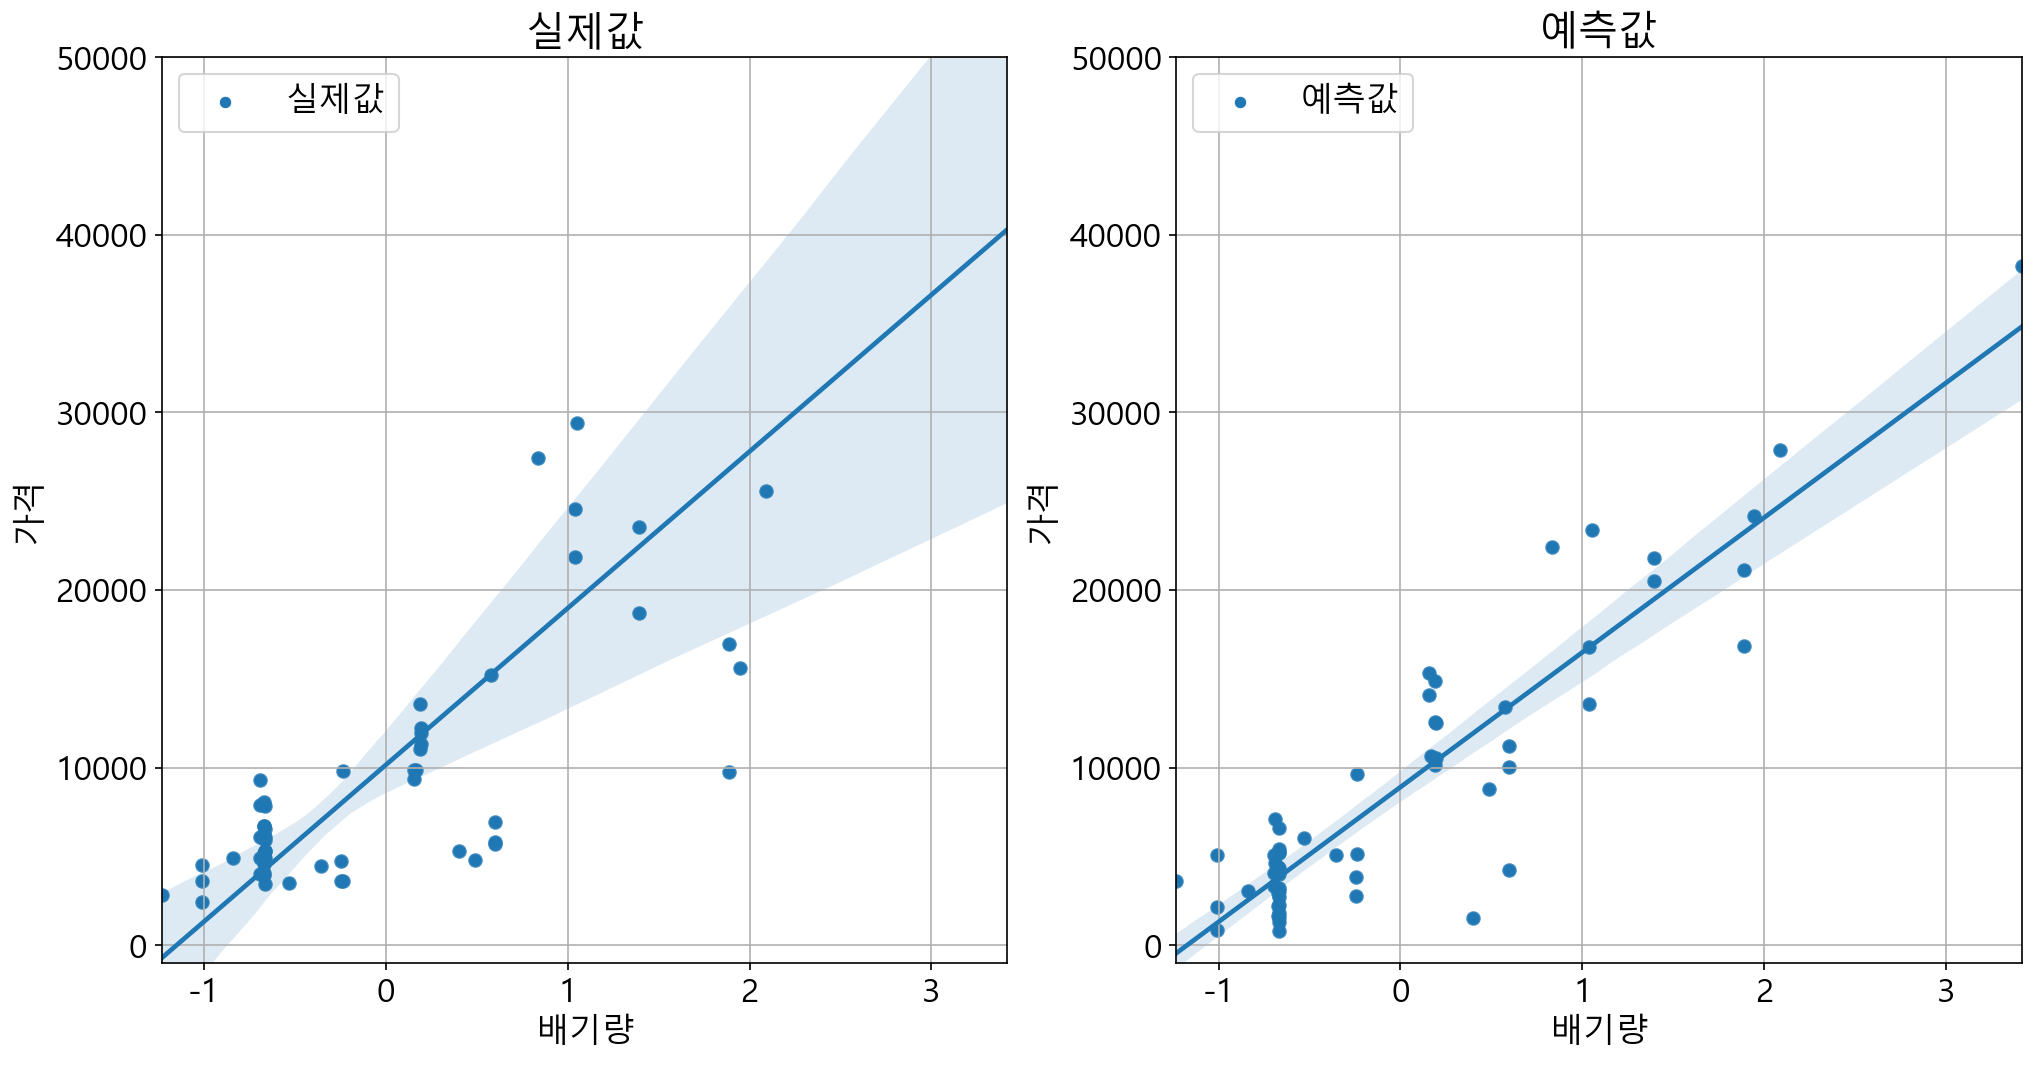

In [65]:
ig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi=150)
sns.scatterplot(x='배기량', y='실제값', data=result_df, label='실제값',ax=ax[0])
sns.regplot(x='배기량', y='실제값', data=result_df,ax=ax[0])
ax[0].set_title('실제값')
ax[0].set_xlabel('배기량')
ax[0].set_ylabel('가격')
ax[0].legend(loc = 'upper left')
ax[0].set_ylim([-1000,50000])
ax[0].grid()

sns.scatterplot(x='배기량', y='예측값', data=result_df, label='예측값',ax=ax[1])
sns.regplot(x='배기량', y='예측값', data=result_df,ax=ax[1])
ax[1].set_title('예측값')
ax[1].set_xlabel('배기량')
ax[1].set_ylabel('가격')
ax[1].legend(loc = 'upper left')
ax[1].set_ylim([-1000,50000])
ax[1].grid()

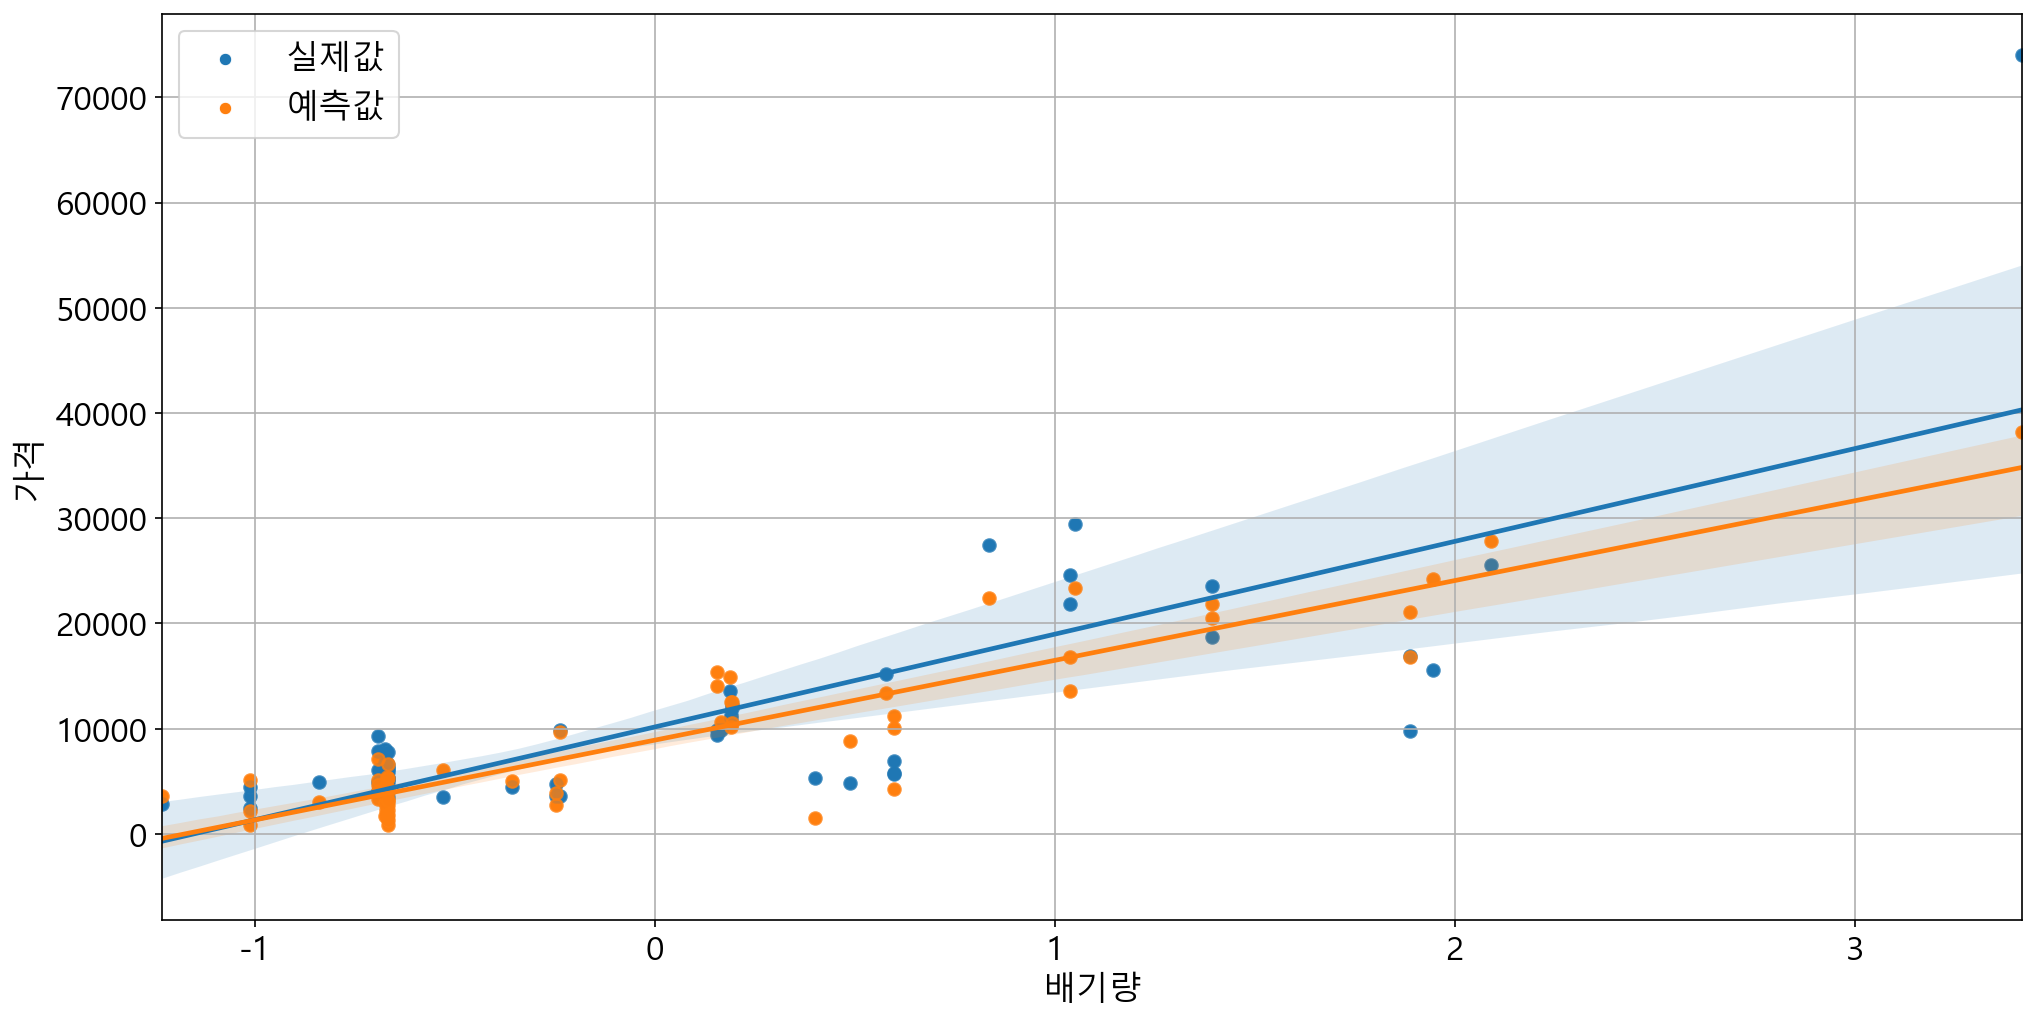

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=150)
sns.scatterplot(x='배기량', y='실제값', data=result_df, label='실제값')
sns.scatterplot(x='배기량', y='예측값', data=result_df, label='예측값')
sns.regplot(x='배기량', y='실제값', data=result_df)
sns.regplot(x='배기량', y='예측값', data=result_df)
ax.set_xlabel('배기량')
ax.set_ylabel('가격')
ax.legend(loc = 'upper left')
ax.grid()

plt.show()
plt.close()